In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
df['returns'] = df.market_value.pct_change(1).mul(100) 
df = df.iloc[1:]

<ipython-input-5-4b7481f7dfc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [6]:
def LLR_test(mod_1, mod_2, DF=1): # models we want to compare and degrees of freedom
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = (2 * (L2 - L1))
  p = chi2.sf(LR, DF).round(3)
  return p

## AR(1) model for returns

In [12]:
model_ret_ar_1 = ARMA(df.returns, order=(1,0))

In [13]:
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()
# P coefficients are significatly over 0.05 this means that model holds no real predicting power

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 0)   Log Likelihood               -7928.655
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 22 Oct 2021   AIC                          15863.311
Time:                        21:57:29   BIC                          15882.874
Sample:                    01-11-1994   HQIC                         15870.166
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.161      0.246      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.633      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.3965           +0.0000j           43.3965            0.5000
-----------------------------------------------------------------------------
"""

## Higher-lag model for returns

In [14]:
model_ret_ar_2 = ARMA(df.returns, order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(2, 0)   Log Likelihood               -7922.353
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 22 Oct 2021   AIC                          15852.707
Time:                        21:57:40   BIC                          15878.790
Sample:                    01-11-1994   HQIC                         15861.847
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.223      0.221      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0501      0.014     -3.552      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4614j            4.4680           -0.2586
AR.2           -0.2417           +4.4614j            4.4680            0.2586
-----------------------------------------------------------------------------
"""

In [10]:
# Create return out of prices
# Use 1 period distance, and multiply by 100 to get percentage
df['returns'] = df.market_value.pct_change(1).mul(100) 
df = df.iloc[1:]

In [15]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [16]:
model_ret_ar_3 = ARMA(df.returns, order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(3, 0)   Log Likelihood               -7905.632
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 22 Oct 2021   AIC                          15821.264
Time:                        21:57:47   BIC                          15853.869
Sample:                    01-11-1994   HQIC                         15832.689
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.333      0.182      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.013      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.708      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.793      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9230           -2.0209j            2.2217           -0.1818
AR.2            0.9230           +2.0209j            2.2217            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [17]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [18]:
model_ret_ar_4 = ARMA(df.returns, order=(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(4, 0)   Log Likelihood               -7900.213
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 22 Oct 2021   AIC                          15812.427
Time:                        21:57:48   BIC                          15851.553
Sample:                    01-11-1994   HQIC                         15826.137
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.271      0.204      -0.010       0.048
ar.L1.returns    -0.0246      0.014     -1.741      0.082      -0.052       0.003
ar.L2.returns    -0.0497      0.014     -3.535      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.702      0.000      -0.108      -0.053
ar.L4.returns     0.0465      0.014      3.294      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8885           -0.0000j            1.8885           -0.5000
AR.2            0.3228           -1.9326j            1.9594           -0.2237
AR.3            0.3228           +1.9326j            1.9594            0.2237
AR.4            2.9689           -0.0000j            2.9689           -0.0000
-----------------------------------------------------------------------------
"""

In [19]:
model_ret_ar_5 = ARMA(df.returns, order=(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(5, 0)   Log Likelihood               -7891.277
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 22 Oct 2021   AIC                          15796.553
Time:                        21:57:48   BIC                          15842.200
Sample:                    01-11-1994   HQIC                         15812.549
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.352      0.176      -0.009       0.046
ar.L1.returns    -0.0218      0.014     -1.546      0.122      -0.049       0.006
ar.L2.returns    -0.0545      0.014     -3.868      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.915      0.000      -0.111      -0.056
ar.L4.returns     0.0450      0.014      3.193      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5480           -0.0000j            1.5480           -0.5000
AR.2           -0.2858           -1.7251j            1.7486           -0.2761
AR.3           -0.2858           +1.7251j            1.7486            0.2761
AR.4            1.4368           -1.2158j            1.8822           -0.1118
AR.5            1.4368           +1.2158j            1.8822            0.1118
-----------------------------------------------------------------------------
"""

In [20]:
model_ret_ar_6 = ARMA(df.returns, order=(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(6, 0)   Log Likelihood               -7885.842
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 22 Oct 2021   AIC                          15787.684
Time:                        21:57:49   BIC                          15839.852
Sample:                    01-11-1994   HQIC                         15805.965
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.418      0.156      -0.007       0.045
ar.L1.returns    -0.0246      0.014     -1.742      0.082      -0.052       0.003
ar.L2.returns    -0.0524      0.014     -3.719      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.012      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.308      0.000      -0.088      -0.033
ar.L6.returns    -0.0465      0.014     -3.299      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2871           -0.9023j            1.5719           -0.0973
AR.2            1.2871           +0.9023j            1.5719            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8665           -0.4831j            1.9280           -0.4597
AR.6           -1.8665           +0.4831j            1.9280            0.4597
-----------------------------------------------------------------------------
"""

In [21]:
model_ret_ar_7 = ARMA(df.returns, order=(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(7, 0)   Log Likelihood               -7885.542
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 22 Oct 2021   AIC                          15789.083
Time:                        21:57:49   BIC                          15847.772
Sample:                    01-11-1994   HQIC                         15809.649
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0241      0.014     -1.704      0.088      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.666      0.000      -0.079      -0.024
ar.L3.returns    -0.0875      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0434      0.014      3.068      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.262      0.000      -0.088      -0.032
ar.L6.returns    -0.0462      0.014     -3.278      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.775      0.438      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6487           -0.5383j            1.7344           -0.4498
AR.2           -1.6487           +0.5383j            1.7344            0.4498
AR.3           -0.1191           -1.4953j            1.5000           -0.2626
AR.4           -0.1191           +1.4953j            1.5000            0.2626
AR.5            1.2791           -0.9793j            1.6109           -0.1040
AR.6            1.2791           +0.9793j            1.6109            0.1040
AR.7            5.2032           -0.0000j            5.2032           -0.0000
-----------------------------------------------------------------------------
"""

In [22]:
print(LLR_test(model_ret_ar_6, model_ret_ar_7))
# model 6 is better than model 7

0.438


## Normalizing values


Xt -> % of X1

Yt -> % of Y1

$100 increase in S&P can be much more significant change than same absolute increase in Nikkei

Same comparison in percents is much more compareable

In [23]:
# set some benchmark
# Interpretation seems easiest if we simply go with the value for the first period
benchmark = df.market_value.iloc[0]

In [24]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [26]:
sts.adfuller(df.norm) 
# test yields high p value (0.34) which suggests non-stationarity 
# normalisation did not result in stationary data so we won't be able to use AR model with the normalized prices

(-1.8779457772515635,
 0.34250616684813634,
 6,
 5012,
 {'1%': -3.431655397510801,
  '5%': -2.862116844845668,
  '10%': -2.567077055158601},
 19627.21698752037)

## Normalizing returns

They account for the absolute profitability of the investment in contrast to prices

They allow us to compare the relative profitability as opposed to non-normalized returns

In [28]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)
# This data is stationary

(-12.790332603910137,
 7.099523586675234e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 64101.053116833515)

### Model selection for normalized returns

In [38]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order=(1, 0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                     ARMA(1, 0)   Log Likelihood              -30031.694
Method:                       css-mle   S.D. of innovations             96.030
Date:                Fri, 22 Oct 2021   AIC                          60069.389
Time:                        22:15:42   BIC                          60088.952
Sample:                    01-11-1994   HQIC                         60076.244
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5381      1.325     -1.161      0.246      -4.135       1.059
ar.L1.norm_ret    -0.0230      0.014     -1.633      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.3965           +0.0000j           43.3965            0.5000
-----------------------------------------------------------------------------
"""

In [39]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2, 0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                     ARMA(2, 0)   Log Likelihood              -30025.392
Method:                       css-mle   S.D. of innovations             95.910
Date:                Fri, 22 Oct 2021   AIC                          60058.785
Time:                        22:16:44   BIC                          60084.868
Sample:                    01-11-1994   HQIC                         60067.925
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5415      1.260     -1.223      0.221      -4.011       0.928
ar.L1.norm_ret    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0501      0.014     -3.552      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4614j            4.4680           -0.2586
AR.2           -0.2417           +4.4614j            4.4680            0.2586
-----------------------------------------------------------------------------
"""

In [40]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order=(7, 0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()
# results are same as returns model
# This means that using normalized values has no impact on model selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                     ARMA(7, 0)   Log Likelihood              -29988.581
Method:                       css-mle   S.D. of innovations             95.208
Date:                Fri, 22 Oct 2021   AIC                          59995.161
Time:                        22:17:23   BIC                          60053.850
Sample:                    01-11-1994   HQIC                         60015.727
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5505      1.106     -1.402      0.161      -3.718       0.617
ar.L1.norm_ret    -0.0241      0.014     -1.704      0.088      -0.052       0.004
ar.L2.norm_ret    -0.0517      0.014     -3.666      0.000      -0.079      -0.024
ar.L3.norm_ret    -0.0875      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.norm_ret     0.0434      0.014      3.068      0.002       0.016       0.071
ar.L5.norm_ret    -0.0601      0.014     -4.262      0.000      -0.088      -0.032
ar.L6.norm_ret    -0.0462      0.014     -3.278      0.001      -0.074      -0.019
ar.L7.norm_ret     0.0109      0.014      0.775      0.438      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6487           -0.5383j            1.7344           -0.4498
AR.2           -1.6487           +0.5383j            1.7344            0.4498
AR.3           -0.1191           -1.4953j            1.5000           -0.2626
AR.4           -0.1191           +1.4953j            1.5000            0.2626
AR.5            1.2791           -0.9793j            1.6109           -0.1040
AR.6            1.2791           +0.9793j            1.6109            0.1040
AR.7            5.2033           -0.0000j            5.2033           -0.0000
-----------------------------------------------------------------------------
"""

## Analyzing residuals

In [44]:
model_ar7 = ARMA(df.market_value, order=[7, 0])
results_ar7 = model_ar7.fit()
print(results_ar7.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5019
Model:                     ARMA(7, 0)   Log Likelihood              -27581.843
Method:                       css-mle   S.D. of innovations             58.907
Date:                Fri, 22 Oct 2021   AIC                          55181.686
Time:                        22:22:54   BIC                          55240.375
Sample:                    01-11-1994   HQIC                         55202.252
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5090.2974    592.930      8.585      0.000    3928.175    6252.419
ar.L1.market_value     0.9786      0.014     69.500      0.000       0.951       1.006
ar.L2.market_value  

In [45]:
df['res_price'] = results_ar7.resid

In [46]:
df.res_price.mean()
# mean close to zero suggests that on average that our model performs well

0.35354479806015054

In [47]:
df.res_price.var()
# high variance indicates that the residuals aren't concentrated around 0 and 1 but are all over the place
# this is primarily because AR model perform poorly when predicting non-stationary data

4029.1389134955057

In [48]:
sts.adfuller(df.res_price)
# p value equals 0

(-76.03795803198685,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 54820.69376349627)

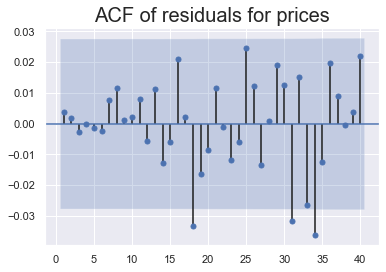

In [49]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title('ACF of residuals for prices', size=20)
plt.show()
# Few points outside the blue area suggests there's an even better predictor

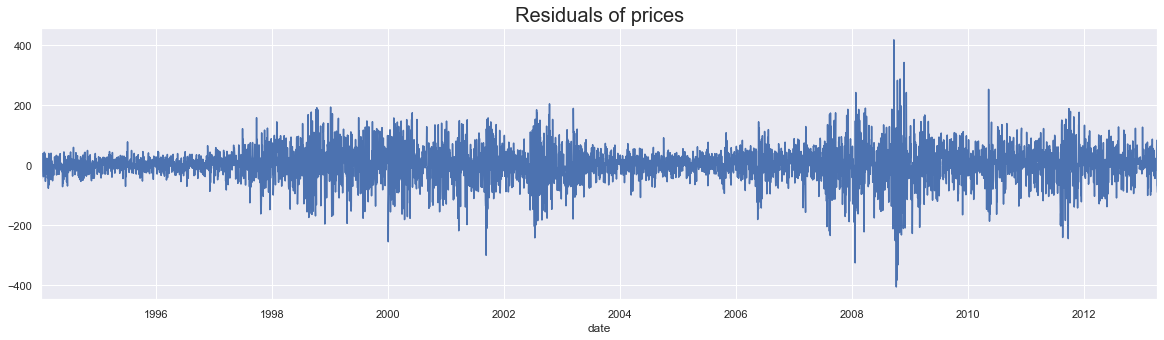

In [52]:
df.res_price[1:].plot(figsize=(20,5))
plt.title('Residuals of prices', size=20)
plt.show()

## Analysing the residuals

In [53]:
df['res_ret'] = results_ret_ar_6.resid

In [54]:
df.res_ret.mean()

-6.56441236438432e-05

In [56]:
df.res_ret.var()

1.3562350562769325

In [57]:
sts.adfuller(df.res_ret)
# p value 0 suggests that data is stationary

(-70.77881811972485,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15686.69142190187)

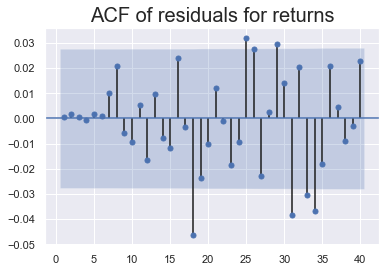

In [59]:
sgt.plot_acf(df.res_ret, zero=False, lags=40)
plt.title('ACF of residuals for returns', size=20)
plt.show()

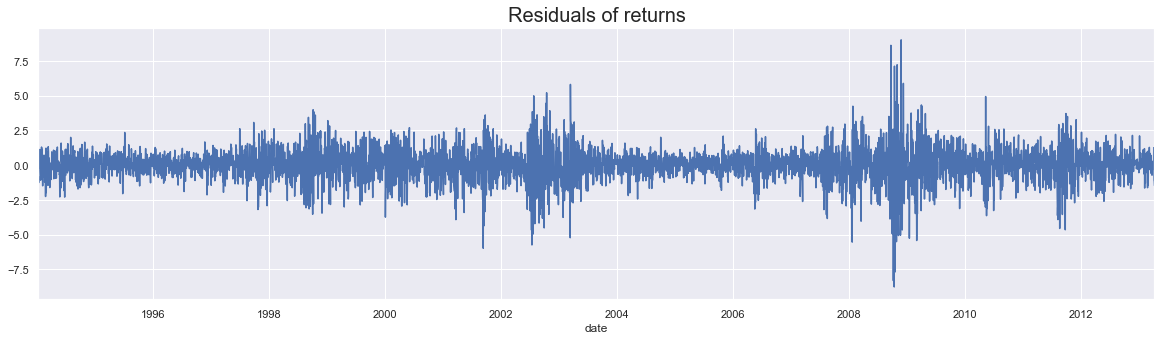

In [60]:
df.res_ret.plot(figsize=(20,5))
plt.title('Residuals of returns', size=20)
plt.show()

## Unexpected shocks from past periods

- autoregressive model need to adjust for shocks because they rely on past data

- there's a self correcting model that corrects itself immeadetely following the big error 

- more errors examined, more adapted model

- Moving Average model (MA) - absorbing these shocks allows the mean to move accordingly 

- They always adjust from error of the previous period

- Gives a model prediction a greater chance to move in similar direction of values it tries to predict

- Stops the model from greatly diverging